<a href="https://colab.research.google.com/github/AshStorm17/ES335_gradient_thinkers/blob/A2_T1/A2/T1_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [ ]:
import numpy as np
import torch

# Set random seed for reproducibility
np.random.seed(45)

# Number of samples
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Convert to PyTorch tensors
x_tensor = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

## Q1


In [ ]:
import torch.nn as nn

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1, bias=True)

    def forward(self, x):
        return self.linear(x)

# Initialize model
model = LinearRegressionModel()

# Define loss function (Mean Squared Error)
criterion = nn.MSELoss()

# True gradients using autograd
theta_0 = 0.0  # Initial bias
theta_1 = 0.0  # Initial slope

# Initialize parameters
model.linear.weight.data.fill_(theta_1)
model.linear.bias.data.fill_(theta_0)

# Compute loss
outputs = model(x_tensor)
loss = criterion(outputs, y_tensor)

# Backward pass to calculate gradients
loss.backward()

# Get gradients
true_gradient_theta_1 = model.linear.weight.grad.item()
true_gradient_theta_0 = model.linear.bias.grad.item()

true_gradient_theta_1, true_gradient_theta_0


(-1.0253019332885742, -7.447054386138916)

## Q2

In [ ]:
# Initialize lists to store stochastic gradients
stochastic_gradients_theta_1 = []
stochastic_gradients_theta_0 = []

# Loop over all data points
for i in range(num_samples):
    model.zero_grad()

    # Forward pass
    output = model(x_tensor[i].reshape(-1, 1))

    # Compute loss
    loss = criterion(output, y_tensor[i].reshape(-1, 1))

    # Backward pass to calculate gradients
    loss.backward()

    # Store gradients
    stochastic_gradients_theta_1.append(model.linear.weight.grad.item())
    stochastic_gradients_theta_0.append(model.linear.bias.grad.item())

# Compute average of stochastic gradients
average_stochastic_gradient_theta_1 = np.mean(stochastic_gradients_theta_1)
average_stochastic_gradient_theta_0 = np.mean(stochastic_gradients_theta_0)

# Calculate the difference between average stochastic gradients and true gradients
diff_theta_1 = average_stochastic_gradient_theta_1 - true_gradient_theta_1
diff_theta_0 = average_stochastic_gradient_theta_0 - true_gradient_theta_0

# Output the results
print(f"Average Stochastic Gradient (theta_1): {average_stochastic_gradient_theta_1}")
print(f"True Gradient (theta_1): {true_gradient_theta_1}")
print(f"Difference (theta_1): {diff_theta_1}")

print(f"Average Stochastic Gradient (theta_0): {average_stochastic_gradient_theta_0}")
print(f"True Gradient (theta_0): {true_gradient_theta_0}")
print(f"Difference (theta_0): {diff_theta_0}")


Average Stochastic Gradient (theta_1): -1.0253017988055944
True Gradient (theta_1): -1.0253019332885742
Difference (theta_1): 1.3448297986329294e-07
Average Stochastic Gradient (theta_0): -7.4470539569854735
True Gradient (theta_0): -7.447054386138916
Difference (theta_0): 4.291534425604482e-07


From above difference we can see SGD is a good estimator of True Gradient.

## Q3


===== Learning Rate: 0.001 =====
Full-Batch GD: Average epochs = 461.60, Average iterations = 461.60
Mini-Batch GD: Average epochs = 179.50, Average iterations = 718.00
Stochastic GD: Average epochs = 67.20, Average iterations = 2688.00


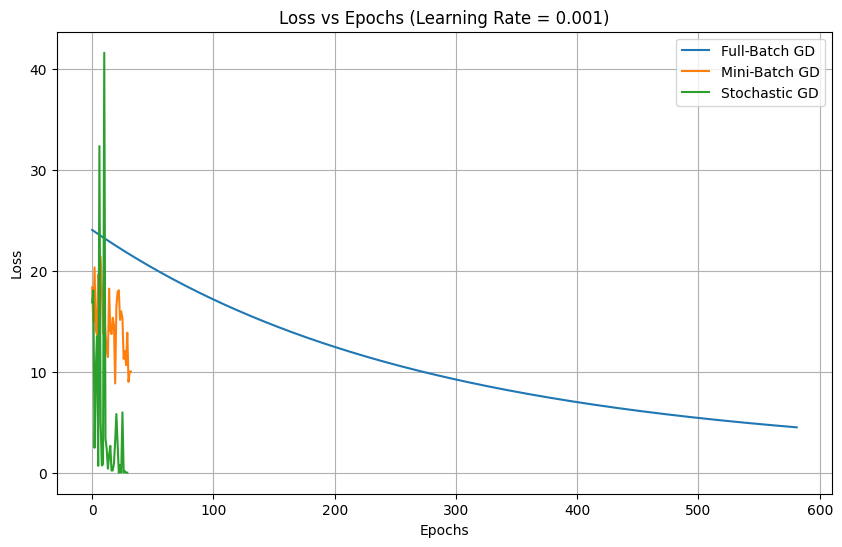


===== Learning Rate: 0.01 =====
Full-Batch GD: Average epochs = 131.80, Average iterations = 131.80
Mini-Batch GD: Average epochs = 59.20, Average iterations = 236.80
Stochastic GD: Average epochs = 40.00, Average iterations = 1600.00


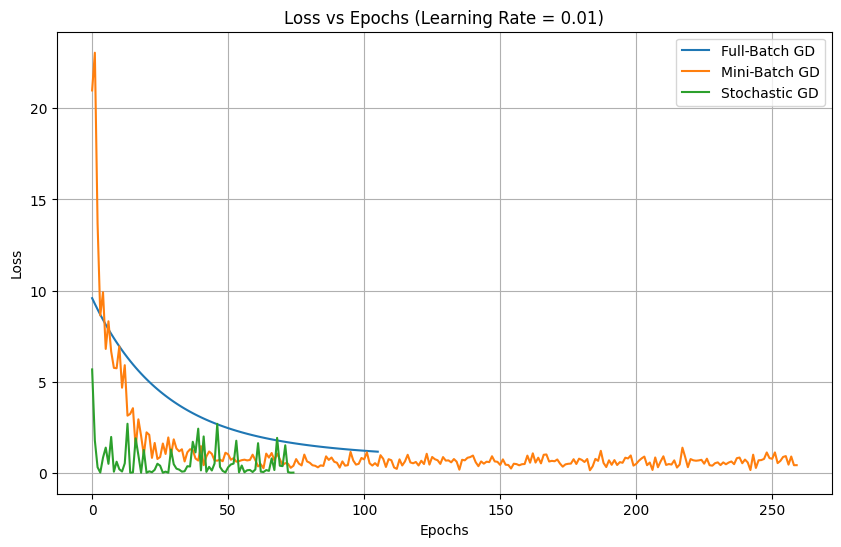


===== Learning Rate: 0.1 =====
Full-Batch GD: Average epochs = 27.80, Average iterations = 27.80
Mini-Batch GD: Average epochs = 26.40, Average iterations = 105.60
Stochastic GD: Average epochs = 35.20, Average iterations = 1408.00


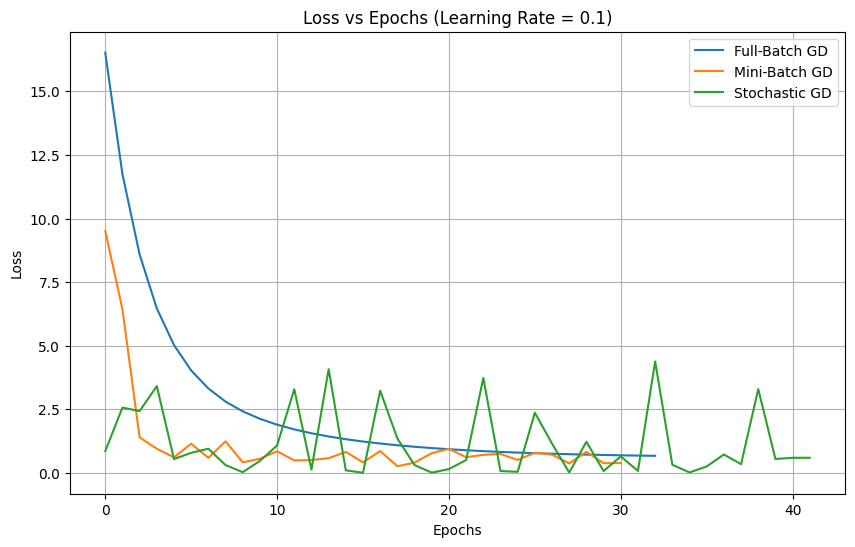

In [14]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(45)
torch.manual_seed(45)

# Generate data
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Convert data to torch tensors
X = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
Y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Model: Linear regression (Y = θ0 + θ1 * X)
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # Linear model

    def forward(self, x):
        return self.linear(x)

# Loss Function: Mean Squared Error
loss_fn = torch.nn.MSELoss()

# Optimization methods
def gradient_descent(model, optimizer, X, Y, batch_size, num_epochs, method):
    loss_history = []
    total_iterations = 0
    for epoch in range(num_epochs):
        if method == 'full_batch':
            optimizer.zero_grad()  # Zero the gradients
            Y_pred = model(X)      # Predict output
            loss = loss_fn(Y_pred, Y)  # Calculate loss
            loss.backward()            # Backpropagation
            optimizer.step()            # Update weights
            total_iterations += 1       # One iteration per epoch
        elif method == 'mini_batch':
            indices = torch.randperm(len(X))
            for i in range(0, len(X), batch_size):
                optimizer.zero_grad()
                batch_indices = indices[i:i+batch_size]
                X_batch, Y_batch = X[batch_indices], Y[batch_indices]
                Y_pred = model(X_batch)
                loss = loss_fn(Y_pred, Y_batch)
                loss.backward()
                optimizer.step()
                total_iterations += 1
        elif method == 'sgd':
            indices = torch.randperm(len(X))
            for i in indices:
                optimizer.zero_grad()
                Y_pred = model(X[i].view(1, -1))
                loss = loss_fn(Y_pred, Y[i].view(1, -1))
                loss.backward()
                optimizer.step()
                total_iterations += 1

        # Save loss for plotting
        loss_history.append(loss.item())

        # Convergence criteria: Stop if the difference between last two losses is <= 0.01
        if epoch > 0 and abs(loss_history[-1] - loss_history[-2]) <= 0.01:
            return loss_history, epoch + 1, total_iterations  # Return loss history, epochs, and iterations

    return loss_history, num_epochs, total_iterations  # If not converged, return all epochs and iterations

# Training setup for each method
num_epochs = 1000
batch_size = 10
num_trials = 10

# Learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]
methods = ['full_batch', 'mini_batch', 'sgd']
method_names = {'full_batch': 'Full-Batch GD', 'mini_batch': 'Mini-Batch GD', 'sgd': 'Stochastic GD'}

# Run experiments and plot results for each learning rate
for lr in learning_rates:
    print(f"\n===== Learning Rate: {lr} =====")

    for method in methods:
        total_epochs = 0
        total_iterations = 0

        # Run multiple trials and average the results
        for trial in range(num_trials):
            model = LinearRegressionModel()
            optimizer = optim.SGD(model.parameters(), lr=lr)
            loss_history, epochs_taken, iterations_taken = gradient_descent(model, optimizer, X, Y, batch_size, num_epochs, method)

            total_epochs += epochs_taken
            total_iterations += iterations_taken

        # Compute the average epochs and iterations
        avg_epochs = total_epochs / num_trials
        avg_iterations = total_iterations / num_trials

        # Print results
        print(f"{method_names[method]}: Average epochs = {avg_epochs:.2f}, Average iterations = {avg_iterations:.2f}")

    # Plot Loss vs Epochs for the last trial of each method
    plt.figure(figsize=(10, 6))
    for method in methods:
        model = LinearRegressionModel()
        optimizer = optim.SGD(model.parameters(), lr=lr)
        loss_history, _, _ = gradient_descent(model, optimizer, X, Y, batch_size, num_epochs, method)
        plt.plot(loss_history, label=f"{method_names[method]}")

    plt.title(f'Loss vs Epochs (Learning Rate = {lr})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


## Q4

In [23]:
import torch
import numpy as np
import plotly.graph_objects as go

# Set seed for reproducibility
np.random.seed(45)
torch.manual_seed(45)

# Generate data
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Convert data to torch tensors
X = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
Y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Model: Linear regression (Y = θ0 + θ1 * X)
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Loss Function: Mean Squared Error
loss_fn = torch.nn.MSELoss()

# Gradient Descent with Momentum (Full Batch & Stochastic)
def gradient_descent_with_momentum(model, X, Y, epsilon=0.001, momentum=0.9, lr=0.01, max_steps=1000, batch_size=None):
    loss_history = []
    theta_history = []  # Initialize to store (bias, weight) tuples
    velocity = {p: torch.zeros_like(p) for p in model.parameters()}

    for step in range(max_steps):
        if batch_size:  # Stochastic or Mini-batch
            indices = np.random.choice(len(X), batch_size, replace=False)
            X_batch, Y_batch = X[indices], Y[indices]
        else:  # Full Batch
            X_batch, Y_batch = X, Y

        # Forward and backward passes
        Y_pred = model(X_batch)
        loss = loss_fn(Y_pred, Y_batch)
        model.zero_grad()
        loss.backward()

        # Parameter update with manual momentum
        with torch.no_grad():
            bias, weight = model.linear.bias.item(), model.linear.weight.item()  # Initialize bias and weight

            for param in model.parameters():
                grad = param.grad
                if grad is not None:
                    velocity[param] = momentum * velocity[param] - lr * grad
                    param += velocity[param]

            # Save parameter values
            bias, weight = model.linear.bias.item(), model.linear.weight.item()

        theta_history.append((bias, weight))  # Save both bias and weight
        loss_history.append(loss.item())

        if step > 0 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
            break

    return loss_history, theta_history, step

# Generate contour plot for visualization using Plotly
def plot_contour_with_vectors_plotly(X, Y, loss_fn, model, theta_history, title):
    theta0_vals = np.linspace(-1, 7, 100)
    theta1_vals = np.linspace(-2, 10, 100)
    Z = np.zeros((100, 100))

    for i, t0 in enumerate(theta0_vals):
        for j, t1 in enumerate(theta1_vals):
            model.linear.bias.data = torch.tensor([t0], dtype=torch.float32)
            model.linear.weight.data = torch.tensor([[t1]], dtype=torch.float32)
            Y_pred = model(X)
            Z[i, j] = loss_fn(Y_pred, Y).item()

    # Prepare contour plot
    fig = go.Figure()

    # Add the loss surface contour
    fig.add_trace(go.Contour(
        z=Z.T,
        x=theta0_vals,
        y=theta1_vals,
        contours_coloring='heatmap',
        colorscale='Jet',
        showscale=True,
        line_smoothing=1,
        colorbar=dict(title="Loss Value")
    ))

    # Plot the optimization trajectory
    theta_history = np.array(theta_history)

    # Add scatter plot for theta updates (Optimization Path)
    fig.add_trace(go.Scatter(
        x=theta_history[:, 0],
        y=theta_history[:, 1],
        mode='markers+lines',
        name='Optimization Path',
        line=dict(color='white', width=2),
        marker=dict(size=8, color='white', symbol='circle-open')
    ))

    fig.update_layout(
        title=title,
        xaxis_title=r'$\theta_0$',
        yaxis_title=r'$\theta_1$',
        height=600,
        width=800,
        showlegend=True
    )

    fig.show()

# Training setup
epsilon = 0.001
momentum_value = 0.9
learning_rate = 0.01
num_trials = 10

# Full Batch
full_batch_steps = []
for _ in range(num_trials):
    model_full_batch = LinearRegressionModel()
    _, theta_history_full_batch, steps_full_batch = gradient_descent_with_momentum(
        model_full_batch, X, Y, epsilon=epsilon, momentum=momentum_value, lr=learning_rate, batch_size=None)
    full_batch_steps.append(steps_full_batch)

# Stochastic Gradient Descent
sgd_steps = []
for _ in range(num_trials):
    model_sgd = LinearRegressionModel()
    _, theta_history_sgd, steps_sgd = gradient_descent_with_momentum(
        model_sgd, X, Y, epsilon=epsilon, momentum=momentum_value, lr=learning_rate, batch_size=1)
    sgd_steps.append(steps_sgd)

# Average steps to convergence
avg_full_batch_steps = np.mean(full_batch_steps)
avg_sgd_steps = np.mean(sgd_steps)

print(f"Average steps for Full Batch Gradient Descent with Momentum: {avg_full_batch_steps}")
print(f"Average steps for Stochastic Gradient Descent with Momentum: {avg_sgd_steps}")

# Plot contour with theta updates for Full Batch using Plotly
plot_contour_with_vectors_plotly(X, Y, loss_fn, model_full_batch, theta_history_full_batch, "Full Batch Gradient Descent with Momentum")

# Plot contour with theta updates for Stochastic Gradient Descent using Plotly
plot_contour_with_vectors_plotly(X, Y, loss_fn, model_sgd, theta_history_sgd, "Stochastic Gradient Descent with Momentum")


Average steps for Full Batch Gradient Descent with Momentum: 59.2
Average steps for Stochastic Gradient Descent with Momentum: 244.5
